## **EDA**

In [ ]:
#library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UAS Bengkod/ObesityDataSet2.csv')

In [ ]:
#Melihat 5 Baris Pertama Dataset
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
#Menampilkan Informasi Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [ ]:
#Cek missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [ ]:
#Menampilkan deskripsi data (statistik deskriptif untuk kolom numerik)
print(df.describe())

         Age Gender Height Weight       CALC  FAVC  FCVC   NCP   SCC SMOKE  \
count   2097   2102   2099   2100       2106  2100  2103  2099  2101  2106   
unique  1394      3   1562   1518          5     3   808   637     3     3   
top       18   Male    1.7     80  Sometimes   yes     3     3    no    no   
freq     124   1056     58     58       1386  1844   647  1183  1997  2054   

        CH2O family_history_with_overweight   FAF   TUE       CAEC  \
count   2105                           2098  2103  2102       2100   
unique  1263                              3  1186  1130          5   
top        2                            yes     0     0  Sometimes   
freq     441                           1705   404   552       1747   

                       MTRANS      NObeyesdad  
count                    2105            2111  
unique                      6               7  
top     Public_Transportation  Obesity_Type_I  
freq                     1572             351  


In [ ]:
# Menampilkan tipe data setiap kolom
print(df.dtypes)


Age                               object
Gender                            object
Height                            object
Weight                            object
CALC                              object
FAVC                              object
FCVC                              object
NCP                               object
SCC                               object
SMOKE                             object
CH2O                              object
family_history_with_overweight    object
FAF                               object
TUE                               object
CAEC                              object
MTRANS                            object
NObeyesdad                        object
dtype: object


In [ ]:
# Menampilkan jumlah baris dan kolom
print(f"Jumlah Baris: {df.shape[0]}")
print(f"Jumlah Kolom: {df.shape[1]}")

Jumlah Baris: 2111
Jumlah Kolom: 17


In [ ]:
#Cek Data Duplikat
print("\nJumlah data duplikat:")
print(df.duplicated().sum())


Jumlah data duplikat:
18


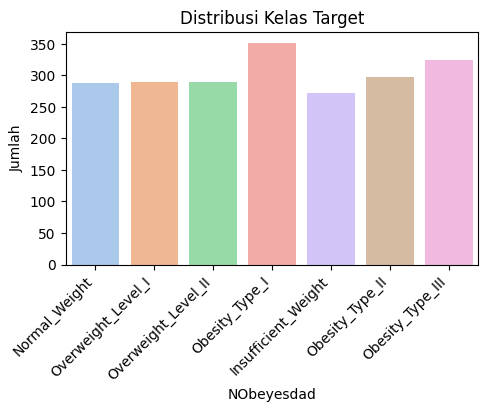

In [ ]:
#Distribusi Kelas Target
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x="NObeyesdad", hue="NObeyesdad", palette="pastel", legend=False)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title("Distribusi Kelas Target")
plt.ylabel("Jumlah")
plt.show()

Age       float64
Height    float64
Weight    float64
dtype: object


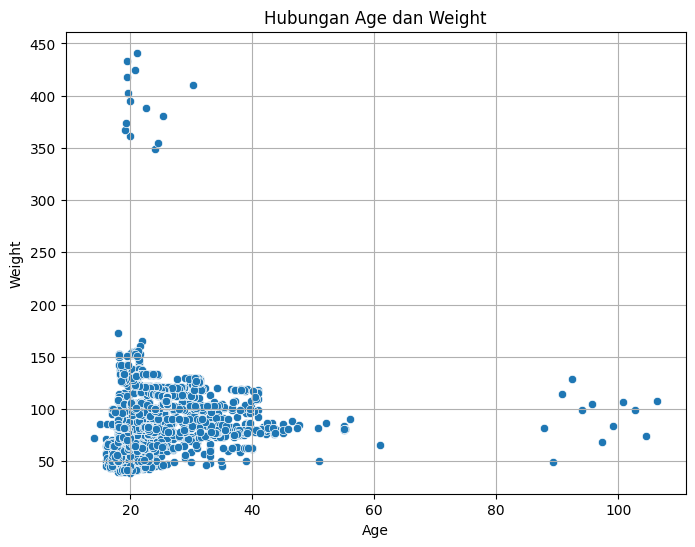

In [ ]:
# Konversi kolom ke numerik
numerik_cols = ['Age', 'Height', 'Weight']
for col in numerik_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(df[numerik_cols].dtypes)

#Scatter plot hubungan antara umur dan berat
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Weight', data=df)
plt.title("Hubungan Age dan Weight")
plt.xlabel("Age")
plt.ylabel("Weight")
plt.grid(True)
plt.show()

## **PRE PROCESSING**

In [ ]:
#Cek Missing Value

#False = data terisi
#True  = data kosong
df.isnull()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2107,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2108,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2109,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Jumlah missing value pada masing-masing variabel yang memiliki missing value
df.isnull().sum()

,0
Age,22
Gender,9
Height,22
Weight,19
CALC,5
FAVC,11
FCVC,8
NCP,12
SCC,10
SMOKE,5


In [ ]:
# Konversi kolom ke numerik (menambah FCVC-TUE)
numerik_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numerik_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(df[numerik_cols].dtypes)

Age       float64
Height    float64
Weight    float64
FCVC      float64
NCP       float64
CH2O      float64
FAF       float64
TUE       float64
dtype: object


In [ ]:
#Imputasi dengan median untuk kolom numerik yang ada missing value dan modus untuk kolom kategorikal

#pisahkan kolom numerik dan kategorikal
numerik_cols = df.select_dtypes(include=['int64', 'float64']).columns
kategorikal_cols = df.select_dtypes(include=['object']).columns

#buat inputers masing-masing
num_inputer = SimpleImputer(strategy='mean')
cat_inputer = SimpleImputer(strategy='most_frequent')

#ColumnTransformer untuk gabung imputasi
preprocessor = ColumnTransformer([
    ('num', num_inputer, numerik_cols),
    ('cat', cat_inputer, kategorikal_cols)
])

#fit transform ke data
df_imputed = preprocessor.fit_transform(df)

#Ubah ke dataframe
df_clean = pd.DataFrame(df_imputed, columns=list(numerik_cols) + list(kategorikal_cols))

In [ ]:
df_clean.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,CALC,FAVC,SCC,SMOKE,family_history_with_overweight,CAEC,MTRANS,NObeyesdad
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,Female,no,no,no,no,yes,Sometimes,Public_Transportation,Normal_Weight
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,Female,Sometimes,no,yes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,23.0,1.8,77.0,2.0,3.0,2.0,2.0,1.0,Male,Frequently,no,no,no,yes,Sometimes,Public_Transportation,Normal_Weight
3,27.0,1.8,87.0,3.0,3.0,2.0,2.0,0.0,Male,Frequently,no,no,no,no,Sometimes,Walking,Overweight_Level_I
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,Male,Sometimes,no,no,no,no,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
#Periksa jumlah baris duplikat
df.duplicated().sum()

np.int64(18)

In [ ]:
#Menampilkan masing-masing 1 data yang terduplikat
duplicates = df[df.duplicated()]
duplicates

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
98,21.0,Female,1.52,42.0,Sometimes,no,3.0,1.0,no,no,1.0,no,0.0,0.0,Frequently,Public_Transportation,Insufficient_Weight
174,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
179,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
184,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
309,16.0,Female,1.66,58.0,no,no,2.0,1.0,no,no,1.0,no,0.0,1.0,Sometimes,Walking,Normal_Weight
460,18.0,Female,1.62,55.0,no,yes,2.0,3.0,no,no,1.0,yes,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
663,21.0,Female,1.52,42.0,Sometimes,yes,3.0,1.0,no,no,1.0,no,0.0,0.0,Frequently,Public_Transportation,Insufficient_Weight
763,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
764,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
824,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I


In [ ]:
#Menampilkan semua data terduplikat
duplicates = df[df.duplicated(keep=False)]
duplicates

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
97,21.0,Female,1.52,42.0,Sometimes,no,3.0,1.0,no,no,1.0,no,0.0,0.0,Frequently,Public_Transportation,Insufficient_Weight
98,21.0,Female,1.52,42.0,Sometimes,no,3.0,1.0,no,no,1.0,no,0.0,0.0,Frequently,Public_Transportation,Insufficient_Weight
145,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
174,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
179,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
184,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
282,18.0,Female,1.62,55.0,no,yes,2.0,3.0,no,no,1.0,yes,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
295,16.0,Female,1.66,58.0,no,no,2.0,1.0,no,no,1.0,no,0.0,1.0,Sometimes,Walking,Normal_Weight
309,16.0,Female,1.66,58.0,no,no,2.0,1.0,no,no,1.0,no,0.0,1.0,Sometimes,Walking,Normal_Weight
460,18.0,Female,1.62,55.0,no,yes,2.0,3.0,no,no,1.0,yes,1.0,1.0,Frequently,Public_Transportation,Normal_Weight


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
#Periksa jumlah baris duplikat
df.duplicated().sum()

np.int64(0)

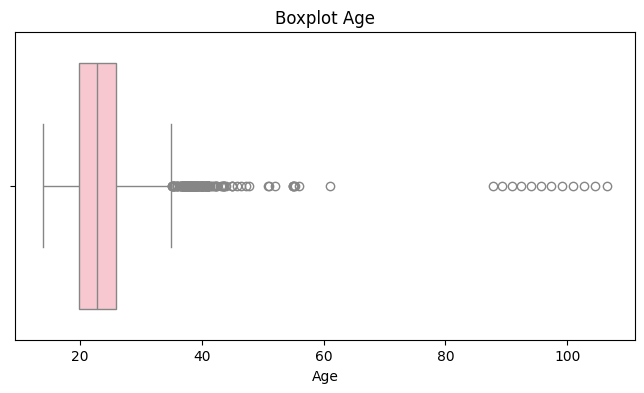

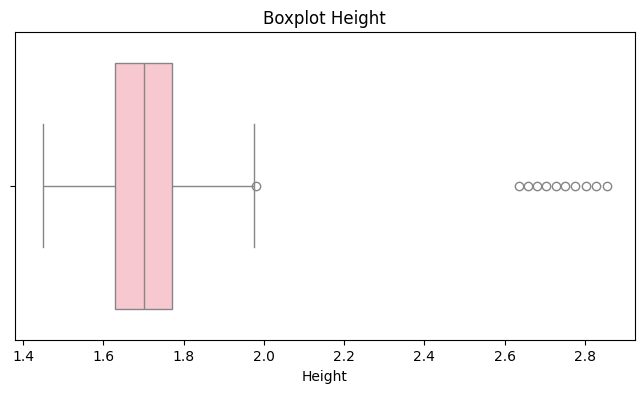

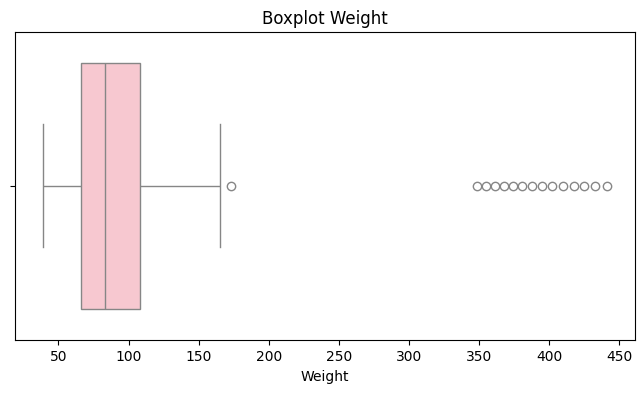

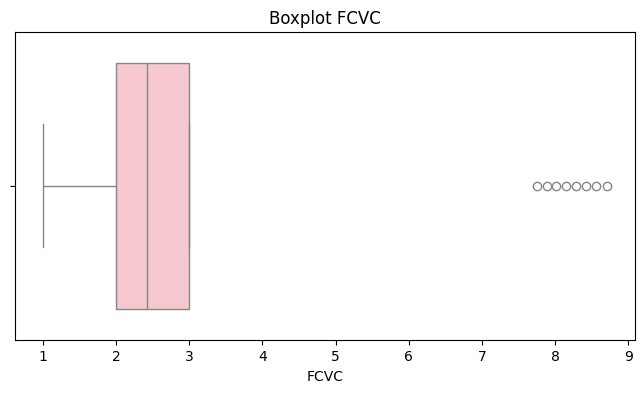

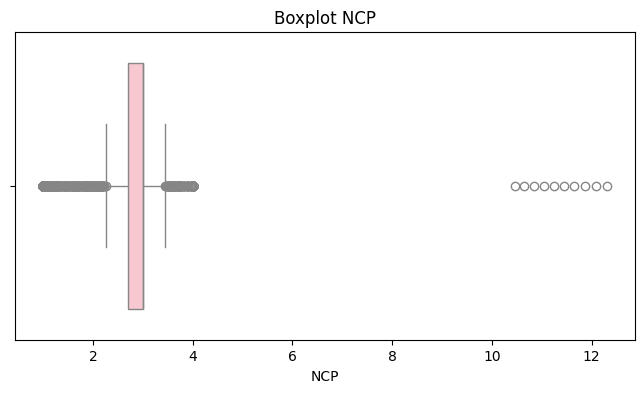

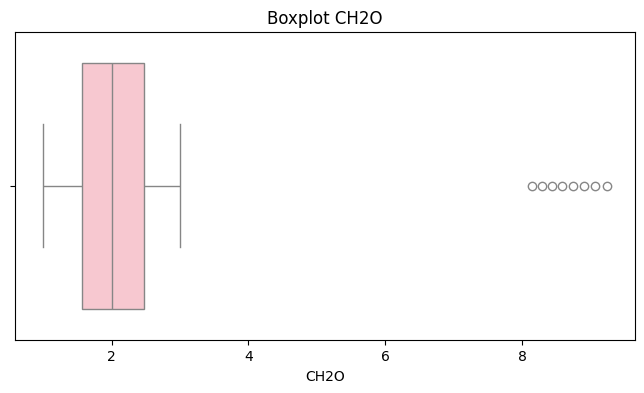

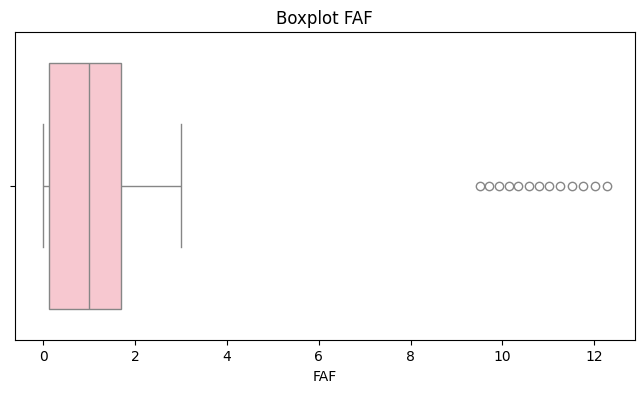

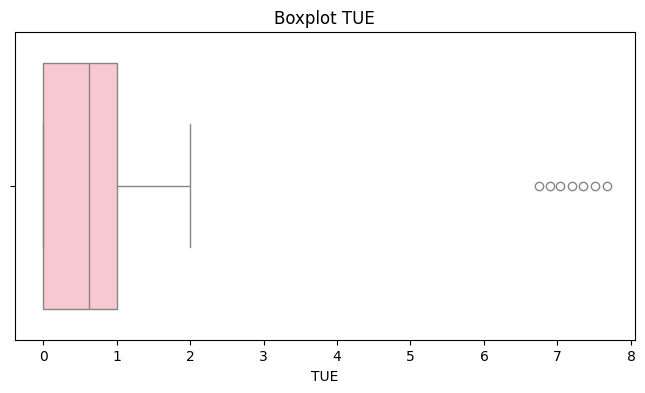

In [ ]:
#Outier

for col in numerik_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='pink')
    plt.title(f'Boxplot {col}')
    plt.show()

In [ ]:
# Buat salinan dataframe asli
df_no_outliers = df.copy()

# Ambil hanya kolom numerik yang tidak seluruhnya NaN
numerik_cols = [col for col in df.select_dtypes(include=['number']).columns if df[col].notna().sum() > 0]

# Loop untuk setiap kolom numerik
for col in numerik_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Lewati jika IQR tidak valid
    if pd.isna(Q1) or pd.isna(Q3) or IQR == 0:
        print(f"{col} -> Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Sisa data: {df_no_outliers.shape[0]} baris (dilewati)")
        continue

    # Filter baris di df_no_outliers yang termasuk dalam batas normal kolom ini
    mask = (df_no_outliers[col] >= (Q1 - 1.5 * IQR)) & (df_no_outliers[col] <= (Q3 + 1.5 * IQR))
    df_no_outliers = df_no_outliers[mask]

    print(f"{col} -> Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Sisa data: {df_no_outliers.shape[0]} baris")


Age -> Q1: 19.947192, Q3: 26.0, IQR: 6.052807999999999, Sisa data: 1892 baris
Height -> Q1: 1.630368, Q3: 1.77, IQR: 0.13963199999999998, Sisa data: 1861 baris
Weight -> Q1: 66.0, Q3: 108.234421, IQR: 42.234421, Sisa data: 1829 baris
FCVC -> Q1: 2.0, Q3: 3.0, IQR: 1.0, Sisa data: 1807 baris
NCP -> Q1: 2.703567, Q3: 3.0, IQR: 0.29643299999999995, Sisa data: 1292 baris
CH2O -> Q1: 1.5693585, Q3: 2.471549, IQR: 0.9021904999999999, Sisa data: 1279 baris
FAF -> Q1: 0.1283935, Q3: 1.688701, IQR: 1.5603075, Sisa data: 1256 baris
TUE -> Q1: 0.0, Q3: 1.0, IQR: 1.0, Sisa data: 1242 baris


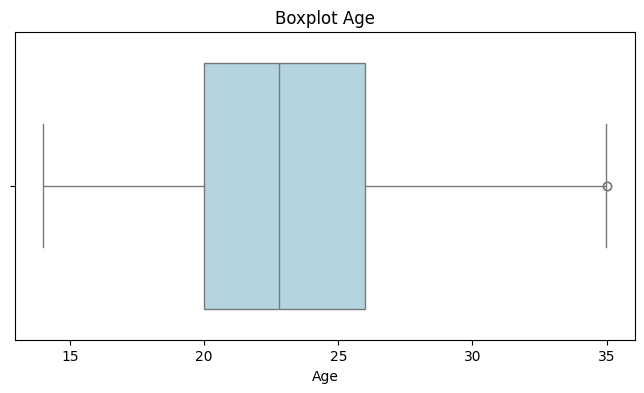

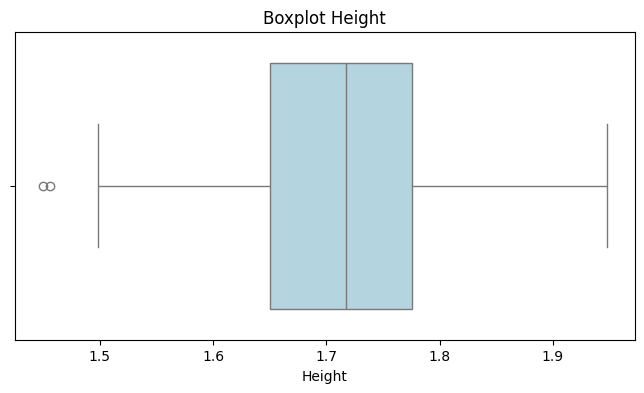

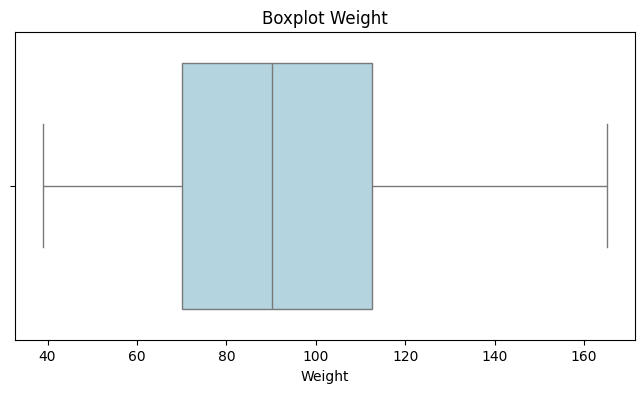

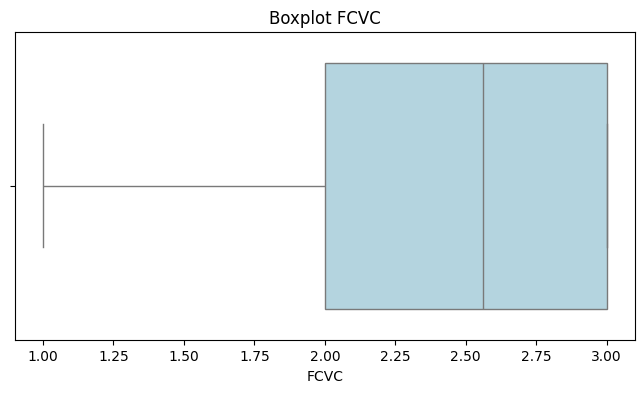

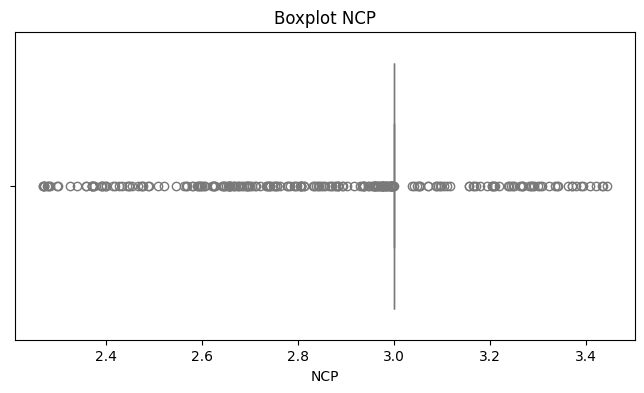

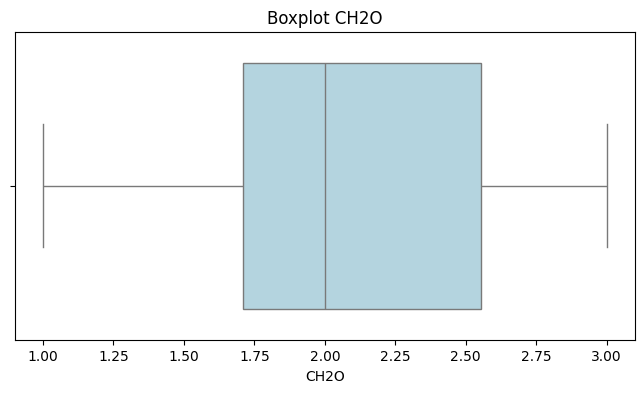

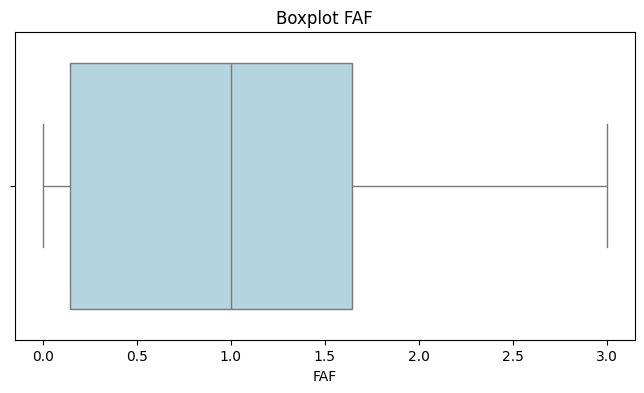

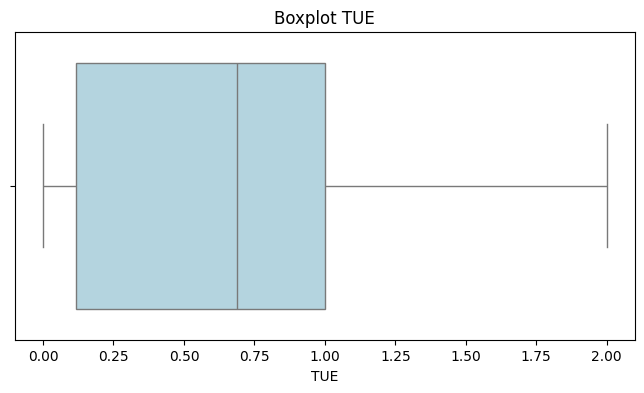

In [ ]:
for col in numerik_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_no_outliers[col], color='lightblue')
    plt.title(f'Boxplot {col}')
    plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2093 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2071 non-null   float64
 1   Gender                          2084 non-null   object 
 2   Height                          2071 non-null   float64
 3   Weight                          2074 non-null   float64
 4   CALC                            2088 non-null   object 
 5   FAVC                            2082 non-null   object 
 6   FCVC                            2075 non-null   float64
 7   NCP                             2071 non-null   float64
 8   SCC                             2083 non-null   object 
 9   SMOKE                           2088 non-null   object 
 10  CH2O                            2078 non-null   float64
 11  family_history_with_overweight  2080 non-null   object 
 12  FAF                             2074 no

In [ ]:
#Label encoding untuk kolom biner
label_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'NObeyesdad']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

#One-hot encoding untuk kolom kategorikal yang bukan biner
df = pd.get_dummies(df, columns=['CAEC', 'CALC', 'MTRANS'], drop_first=True)

In [ ]:
df.head()

,Age,Gender,Height,Weight,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1,1.62,64.0,1,2.0,3.0,1,1,2.0,...,False,False,False,False,True,False,False,False,True,False
1,21.0,1,1.52,56.0,1,3.0,3.0,2,2,3.0,...,False,False,False,True,False,False,False,False,True,False
2,23.0,2,1.80,77.0,1,2.0,3.0,1,1,2.0,...,False,False,True,False,False,False,False,False,True,False
3,27.0,2,1.80,87.0,1,3.0,3.0,1,1,2.0,...,False,False,True,False,False,False,False,False,False,True
4,22.0,2,1.78,89.8,1,2.0,1.0,1,1,2.0,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
#Tampilkan nilai-nilai unik yang ada pada setiap kolom kategorikal dalam dataset
for col in kategorikal_cols:
    if col in df.columns:
        print(f"{col} has {df[col].unique()} values\n")
    else:
        print(f"{col} tidak ditemukan di dataframe!\n")


Gender has [1 2 0 3] values

CALC tidak ditemukan di dataframe!

FAVC has [1 2 0 3] values

SCC has [1 2 3 0] values

SMOKE has [1 2 0 3] values

family_history_with_overweight has [2 1 3 0] values

CAEC tidak ditemukan di dataframe!

MTRANS tidak ditemukan di dataframe!

NObeyesdad has [1 5 6 2 0 3 4] values



In [ ]:
df.columns.tolist()


['Age',
 'Gender',
 'Height',
 'Weight',
 'FAVC',
 'FCVC',
 'NCP',
 'SCC',
 'SMOKE',
 'CH2O',
 'family_history_with_overweight',
 'FAF',
 'TUE',
 'NObeyesdad',
 'CAEC_Always',
 'CAEC_Frequently',
 'CAEC_Sometimes',
 'CAEC_no',
 'CALC_Always',
 'CALC_Frequently',
 'CALC_Sometimes',
 'CALC_no',
 'MTRANS_Automobile',
 'MTRANS_Bike',
 'MTRANS_Motorbike',
 'MTRANS_Public_Transportation',
 'MTRANS_Walking']

In [ ]:
kategorikal_cols = ['Gender', 'FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE',
                    'CH2O', 'family_history_with_overweight', 'FAF',
                    'TUE', 'NObeyesdad']

In [ ]:
for col in kategorikal_cols:
    if col in df.columns:
        print(f"{col} has {df[col].unique()} values\n")
    else:
        print(f"{col} tidak ditemukan di dataframe!\n")

Gender has [1 2 0 3] values

FAVC has [1 2 0 3] values

FCVC has [2.         3.         1.                nan 8.14899274 8.42397393
 2.450218   2.880161   2.00876    2.596579   2.591439   2.392665
 1.123939   2.027574   2.658112   2.88626    2.714447   2.750715
 1.4925     2.205439   2.059138   2.310423   2.823179   2.052932
 2.596364   2.767731   2.815157   2.737762   2.524428   2.971574
 1.0816     1.270448   1.344854   2.959658   2.725282   2.844607
 2.44004    2.432302   2.592247   2.449267   2.929889   2.015258
 1.031149   1.592183   1.21498    1.522001   2.703436   2.362918
 2.14084    2.5596     2.336044   1.813234   2.724285   2.71897
 1.133844   1.757466   2.979383   2.204914   2.927218   2.88853
 2.890535   2.530066   2.241606   1.003566   2.652779   2.897899
 2.483979   2.945967   2.478891   2.784464   1.005578   2.938031
 2.842102   1.889199   2.943749   2.33998    1.950742   2.277436
 2.371338   2.984425   2.977018   2.663421   2.753752   2.318355
 2.594653   2.886157   2.

In [ ]:
for col in kategorikal_cols:
    print(f"\\Nilai unik kolom '{col}':")
    print(df[col].value_counts())

\Nilai unik kolom 'Gender':
Gender
2    1042
1    1029
0      13
3       9
Name: count, dtype: int64
\Nilai unik kolom 'FAVC':
FAVC
2    1828
1     243
0      11
3      11
Name: count, dtype: int64
\Nilai unik kolom 'FCVC':
FCVC
3.000000    645
2.000000    576
1.000000     33
2.442536      2
2.823179      2
           ... 
2.010684      1
2.300408      1
2.119643      1
2.901924      1
2.749629      1
Name: count, Length: 807, dtype: int64
\Nilai unik kolom 'NCP':
NCP
3.000000    1182
1.000000     179
4.000000      69
2.644692       2
1.104642       2
            ... 
3.054899       1
3.118013       1
3.335876       1
3.205009       1
3.608850       1
Name: count, Length: 636, dtype: int64
\Nilai unik kolom 'SCC':
SCC
1    1979
2      96
3      10
0       8
Name: count, dtype: int64
\Nilai unik kolom 'SMOKE':
SMOKE
1    2036
2      44
0       8
3       5
Name: count, dtype: int64
\Nilai unik kolom 'CH2O':
CH2O
2.000000    441
1.000000    207
3.000000    146
2.825629      3
1.636326    

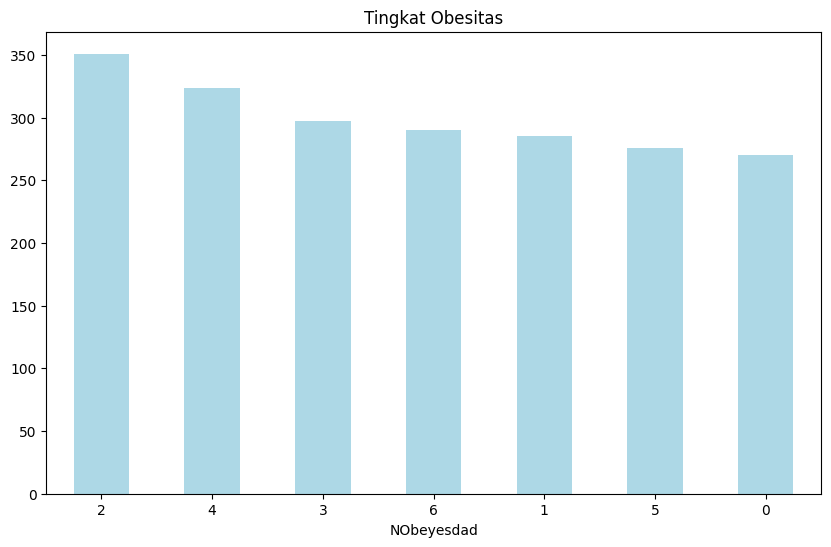

In [ ]:
#Imbalance Data
df['NObeyesdad'].value_counts().plot(kind='bar', figsize=(10, 6), color=['lightblue'])
plt.title("Tingkat Obesitas")
plt.xticks(rotation=0)
plt.show()

Distribusi kelas setelah oversampling:
NObeyesdad
1    351
5    351
6    351
2    351
0    351
3    351
4    351
Name: count, dtype: int64


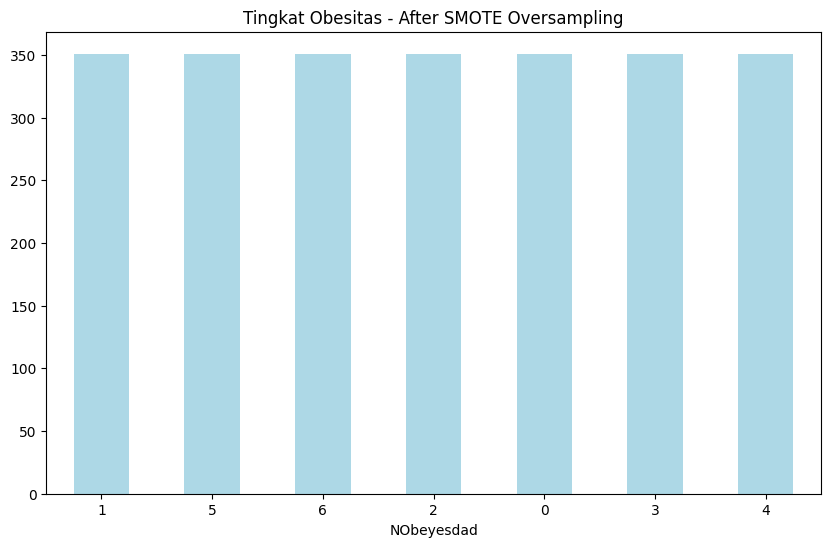

In [ ]:
# Pisahkan fitur (X) dan target (y)
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Tangani nilai NaN dengan SimpleImputer (mengisi dengan median)
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Terapkan SMOTE
smote = SMOTE(random_state=42, sampling_strategy='not majority')  # Oversample kelas minoritas
X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

# Gabungkan kembali data yang sudah di-resample
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['NObeyesdad'] = y_resampled

# Cek distribusi setelah oversampling
print("Distribusi kelas setelah oversampling:")
print(df_resampled['NObeyesdad'].value_counts())

# Visualisasi distribusi
df_resampled['NObeyesdad'].value_counts().plot(kind='bar', figsize=(10, 6), color=['lightblue'])
plt.title("Tingkat Obesitas - After SMOTE Oversampling")
plt.xticks(rotation=0)
plt.show()

In [ ]:
#NORMALISASI
#Memisahkan fitur dan label
X = df_resampled.drop(columns=['NObeyesdad'])
y = df_resampled['NObeyesdad']

In [ ]:
#Melakukan normalisasi hanya pada fitur (tanpa label)
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
#Menggabungkan kembali dengan label untuk melihat hasilnya
df_normalisas = pd.concat([X_normalized, y.reset_index(drop=True)], axis=1)

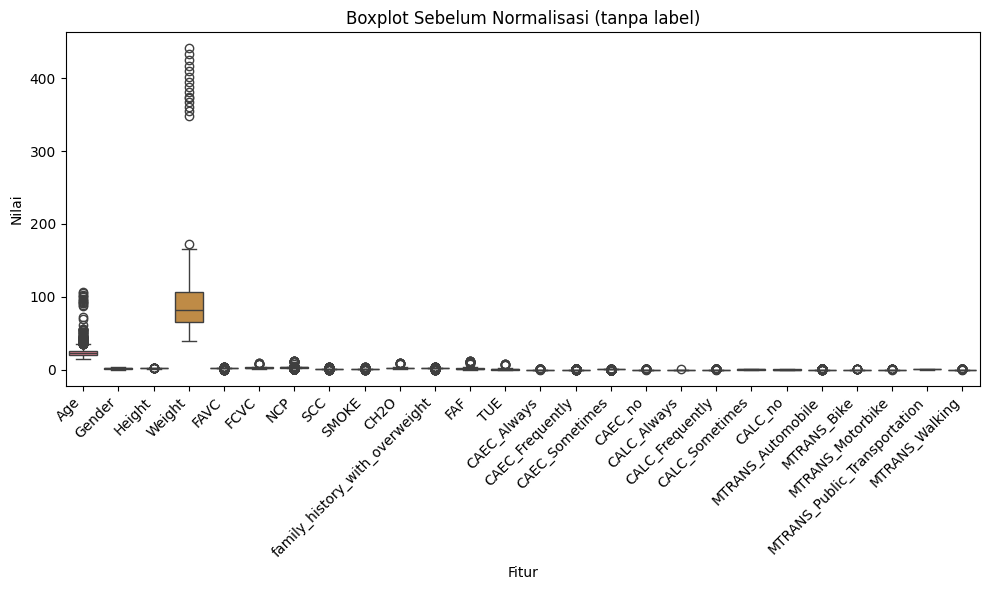

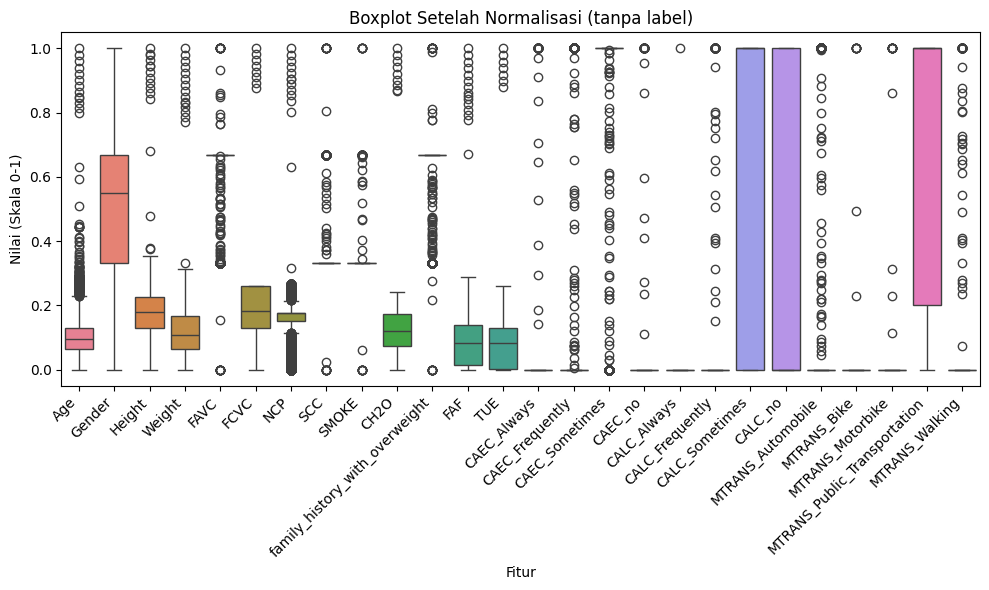

In [ ]:
# Visualisasi sebelum normalisasi
plt.figure(figsize=(10, 6))
sns.boxplot(data=X)
plt.title("Boxplot Sebelum Normalisasi (tanpa label)")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Fitur")
plt.ylabel("Nilai")
plt.tight_layout()
plt.show()

# Visualisasi setelah normalisasi
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_normalized)
plt.title("Boxplot Setelah Normalisasi (tanpa label)")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Fitur")
plt.ylabel("Nilai (Skala 0-1)")
plt.tight_layout()
plt.show()

## **MODELLING DAN EVALUASI**

In [ ]:
# Pisahkan data train dan test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Ukuran Data Train:", X_train.shape)
print("Ukuran Data Test:", X_test.shape)

Ukuran Data Train: (1965, 26)
Ukuran Data Test: (492, 26)


**1. Random Forrest Regressor**

In [ ]:
# Membuat model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model dengan data training
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#Evaluasi Model

import time
from sklearn.metrics import accuracy_score, classification_report

# Mengukur waktu pelatihan
start_time = time.time()

# Melatih model (asumsikan rf_model sudah didefinisikan)
rf_model.fit(X_train, y_train)

# Menghitung waktu pelatihan
training_time = time.time() - start_time

# Memprediksi data test
y_pred = rf_model.predict(X_test)

# Menampilkan hasil evaluasi
print("Waktu Pelatihan:", training_time, "detik")
print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Waktu Pelatihan: 0.6651506423950195 detik
Akurasi Model: 0.9491869918699187

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        71
           1       0.86      0.93      0.89        71
           2       0.94      0.97      0.95        65
           3       1.00      0.99      0.99        69
           4       0.97      0.97      0.97        73
           5       0.92      0.92      0.92        64
           6       0.96      0.92      0.94        79

    accuracy                           0.95       492
   macro avg       0.95      0.95      0.95       492
weighted avg       0.95      0.95      0.95       492



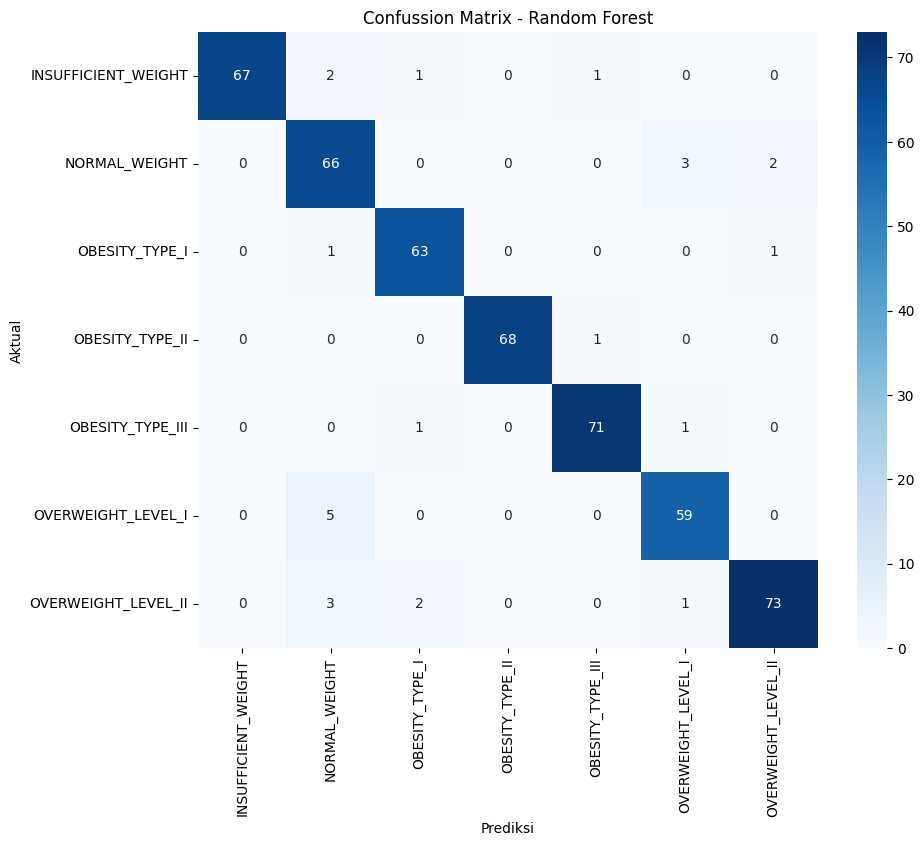

In [ ]:
# Prediksi pada data uji
y_pred = rf_model.predict(X_test)

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Tentukan label kelas berdasarkan pemetaan
classes = ['INSUFFICIENT_WEIGHT', 'NORMAL_WEIGHT', 'OBESITY_TYPE_I', 'OBESITY_TYPE_II',
           'OBESITY_TYPE_III', 'OVERWEIGHT_LEVEL_I', 'OVERWEIGHT_LEVEL_II']

# Tampilkan dengan seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confussion Matrix - Random Forest')
plt.show()

**2. SVM**

In [ ]:
# Membuat model SVM
svm_model = SVC(kernel='rbf', random_state=42)

# Melatih model dengan data training
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
# Evaluasi Model
import time
from sklearn.metrics import accuracy_score, classification_report

# Mengukur waktu pelatihan
start_time = time.time()

# Melatih model
svm_model.fit(X_train, y_train)

# Menghitung waktu pelatihan
training_time = time.time() - start_time

# Memprediksi data test
y_pred = svm_model.predict(X_test)

# Menampilkan hasil evaluasi
print("Waktu Pelatihan:", training_time, "detik")
print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Waktu Pelatihan: 0.13343477249145508 detik
Akurasi Model: 0.5609756097560976

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.71      0.86      0.78        71
           1       0.46      0.34      0.39        71
           2       0.44      0.25      0.32        65
           3       0.55      0.87      0.67        69
           4       0.81      0.36      0.50        73
           5       0.51      0.52      0.51        64
           6       0.50      0.71      0.59        79

    accuracy                           0.56       492
   macro avg       0.57      0.56      0.54       492
weighted avg       0.57      0.56      0.54       492



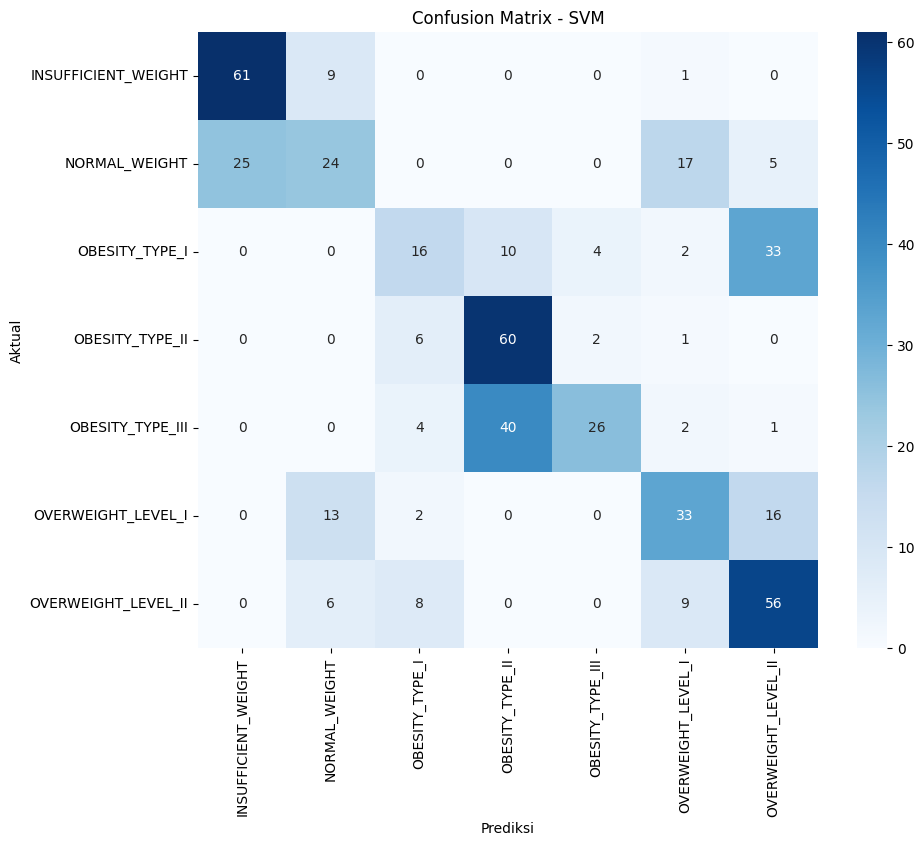

In [ ]:
# Prediksi pada data uji
y_pred = svm_model.predict(X_test)

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Tentukan label kelas berdasarkan pemetaan
classes = ['INSUFFICIENT_WEIGHT', 'NORMAL_WEIGHT', 'OBESITY_TYPE_I', 'OBESITY_TYPE_II',
           'OBESITY_TYPE_III', 'OVERWEIGHT_LEVEL_I', 'OVERWEIGHT_LEVEL_II']

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - SVM')
plt.show()

**3. KNN**

In [ ]:
# Membuat model KNN dengan jumlah tetangga K=5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Melatih model dengan data training
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Evaluasi Model
import time
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Mengukur waktu pelatihan
start_time = time.time()

# Melatih model
knn_model.fit(X_train, y_train)

# Menghitung waktu pelatihan
training_time = time.time() - start_time

# Memprediksi data test
y_pred = knn_model.predict(X_test)

# Menampilkan hasil evaluasi
print("Waktu Pelatihan:", training_time, "detik")
print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Waktu Pelatihan: 0.0012085437774658203 detik
Akurasi Model: 0.8841463414634146

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92        71
           1       0.88      0.65      0.75        71
           2       0.81      0.94      0.87        65
           3       0.99      0.99      0.99        69
           4       0.97      0.96      0.97        73
           5       0.80      0.86      0.83        64
           6       0.89      0.82      0.86        79

    accuracy                           0.88       492
   macro avg       0.89      0.89      0.88       492
weighted avg       0.89      0.88      0.88       492



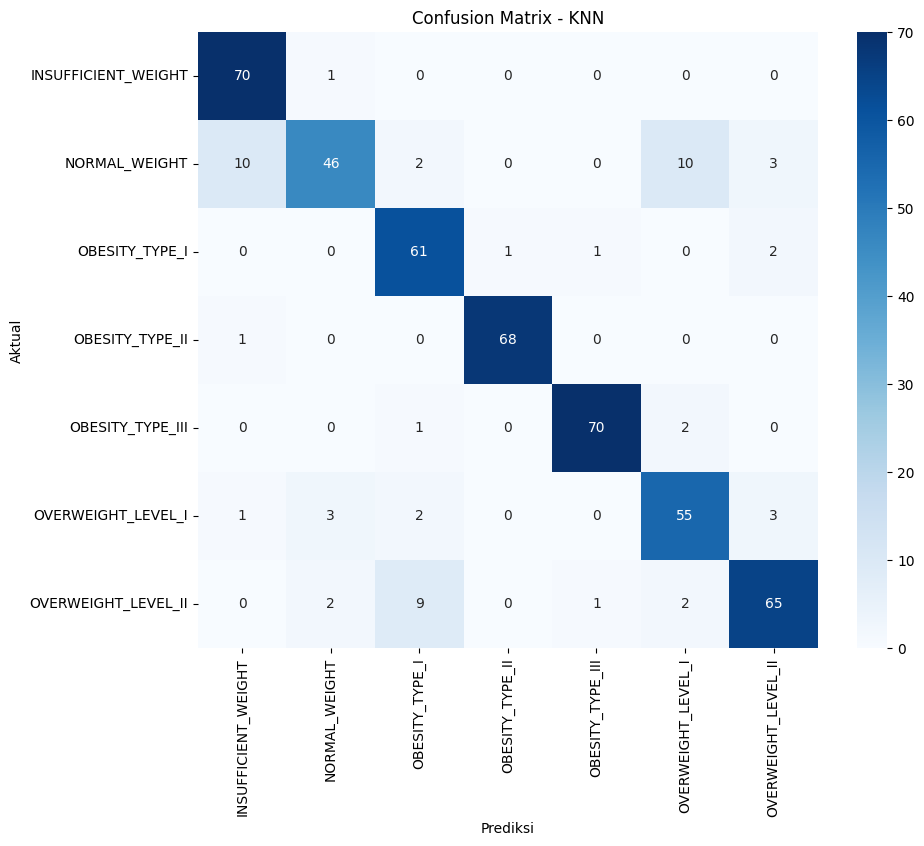

In [ ]:
# Prediksi pada data uji
y_pred = knn_model.predict(X_test)

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Tentukan label kelas berdasarkan pemetaan
classes = ['INSUFFICIENT_WEIGHT', 'NORMAL_WEIGHT', 'OBESITY_TYPE_I', 'OBESITY_TYPE_II',
           'OBESITY_TYPE_III', 'OVERWEIGHT_LEVEL_I', 'OVERWEIGHT_LEVEL_II']

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - KNN')
plt.show()

**Perbandingan Model**

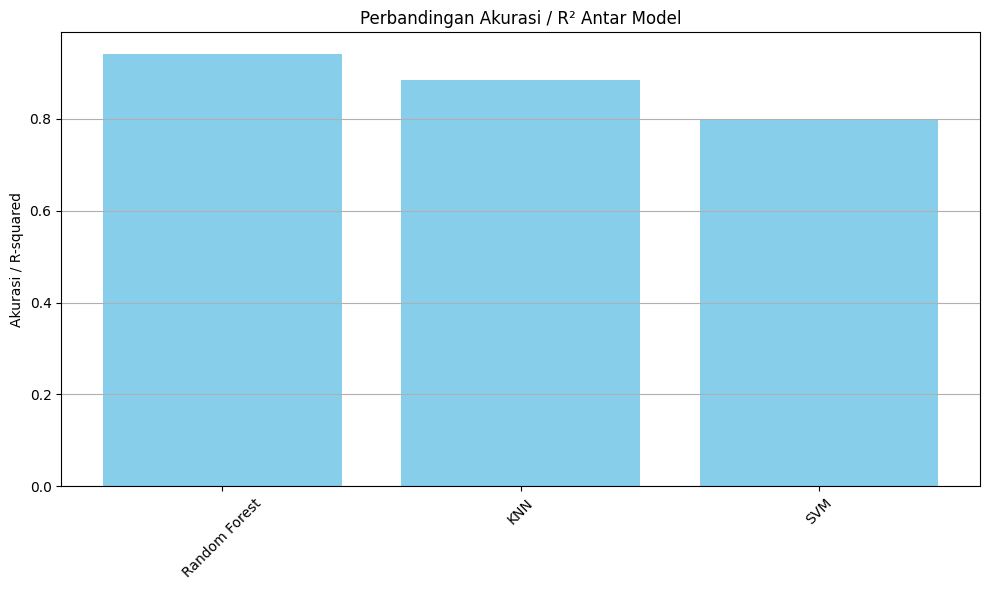

In [ ]:
# Tempat menyimpan hasil
model_names = []
accuracies = []
training_times = []

# Random Forest
start = time.time()
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
training_times.append(time.time() - start)
accuracies.append(accuracy_score(y_test, rf_model.predict(X_test)))
model_names.append("Random Forest")

# KNN
start = time.time()
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
training_times.append(time.time() - start)
accuracies.append(accuracy_score(y_test, knn_model.predict(X_test)))
model_names.append("KNN")

# SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

start = time.time()
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)
training_times.append(time.time() - start)
accuracies.append(accuracy_score(y_test, svm_model.predict(X_test_scaled)))
model_names.append("SVM")

# Plot Perbandingan Akurasi / R²
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.ylabel("Akurasi / R-squared")
plt.title("Perbandingan Akurasi / R² Antar Model")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("model_accuracy_comparison.png")
plt.show()

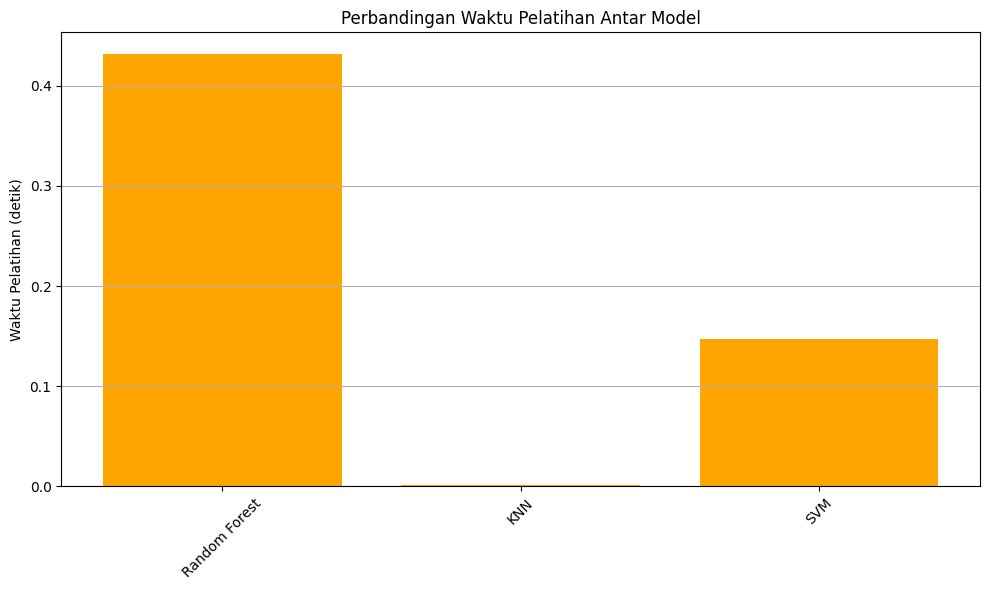

In [ ]:
# Plot Waktu Pelatihan
plt.figure(figsize=(10, 6))
plt.bar(model_names, training_times, color='orange')
plt.ylabel("Waktu Pelatihan (detik)")
plt.title("Perbandingan Waktu Pelatihan Antar Model")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("model_training_time_comparison.png")
plt.show()

Kesimpulan :

1. Apabila akurasi menjadi prioritas utama, maka Random Forest adalah pilihan terbaik meskipun waktu pelatihannya lebih lama.

2. Apabila dibutuhkan waktu pelatihan cepat dan akurasi masih dalam batas baik, maka KNN atau SVM layak dipertimbangkan.

3. Kombinasi hyperparameter tuning dapat digunakan pada ketiga model untuk melihat potensi peningkatan performa lebih lanjut.
